In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
label_encoder = LabelEncoder()
file_path = r"D:\Coding_Dev\College\SEM_6\ML\Assets\breast_cancer_wisconsin_original\breast-cancer-wisconsin.data"
ds_data = pd.read_csv(file_path, sep=",")
df = pd.DataFrame(ds_data)
df = df.drop('1000025', axis=1)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "ClassLabel"]

In [3]:
x = df.drop(columns=["ClassLabel"])
y = df["ClassLabel"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

mean_accuracy = clf.score(x_test, y_test) # mean accuracy
print("Mean accuracy: ", mean_accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Subset accuracy:", accuracy)

tree_depth = clf.get_depth()
print("Tree depth:", tree_depth)

Mean accuracy:  0.9658536585365853
Subset accuracy: 0.9658536585365853
Tree depth: 7


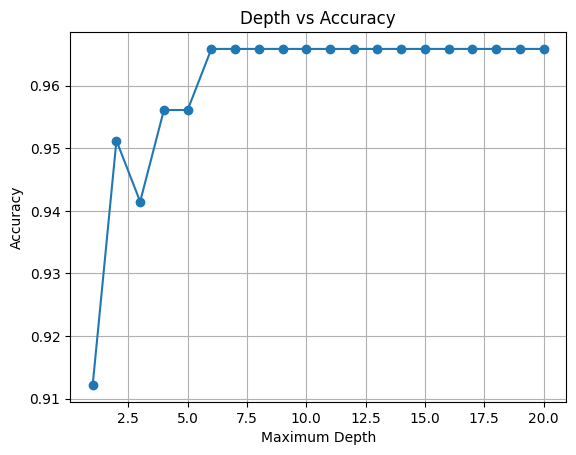

In [5]:
import matplotlib.pyplot as plt

max_depths = range(1, 21)  # Experiment with different maximum depths
accuracies = []
depths = []

for max_depth in max_depths:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_model.fit(x_train, y_train)
    y_pred = tree_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    depths.append(max_depth)

# Plot depth versus accuracy
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Depth vs Accuracy')
plt.grid(True)
plt.show()

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Replace with your actual path

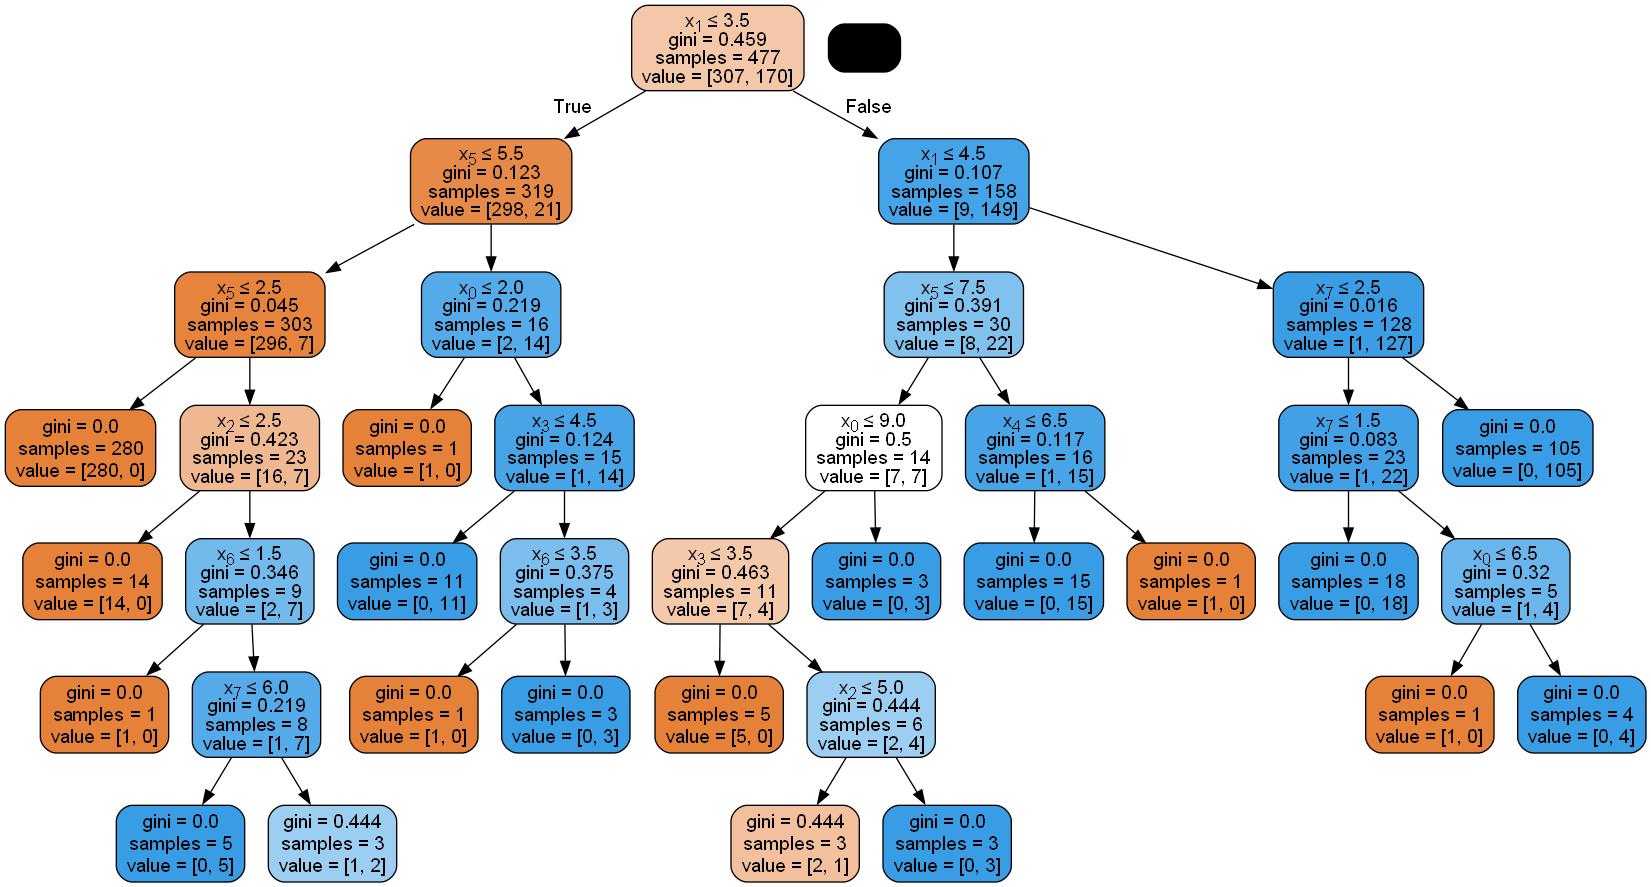

In [9]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

best_depth = max_depths[accuracies.index(max(accuracies))]
best_tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_model.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(best_tree_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["ClassLabel"])
y = df["ClassLabel"]

# Perform a 70-30 split for training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=58)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build the decision tree model
# tree_model = DecisionTreeClassifier(random_state=58)
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without pre-pruning:", accuracy)

# Get the depth of the tree
tree_depth = tree_model.get_depth()
print("Depth of the tree without pre-pruning:", tree_depth)


Accuracy without pre-pruning: 0.9658536585365853
Depth of the tree without pre-pruning: 8


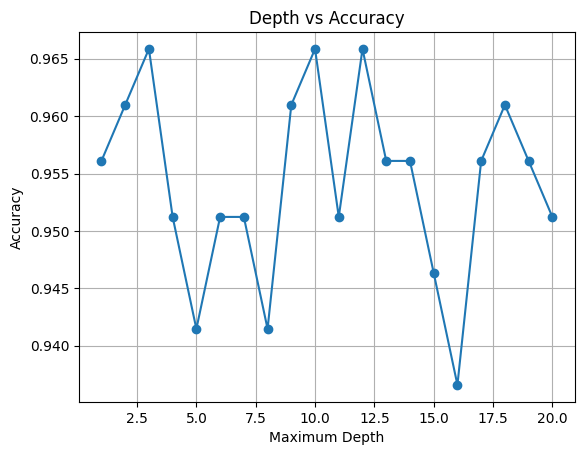

In [58]:
import matplotlib.pyplot as plt

max_depths = range(1, 21)  # Experiment with different maximum depths
accuracies = []
depths = []

for max_depth in max_depths:
    # tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=58)
    tree_model = DecisionTreeClassifier(max_depth=max_depth)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    depths.append(max_depth)

# Plot depth versus accuracy
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Depth vs Accuracy')
plt.grid(True)
plt.show()


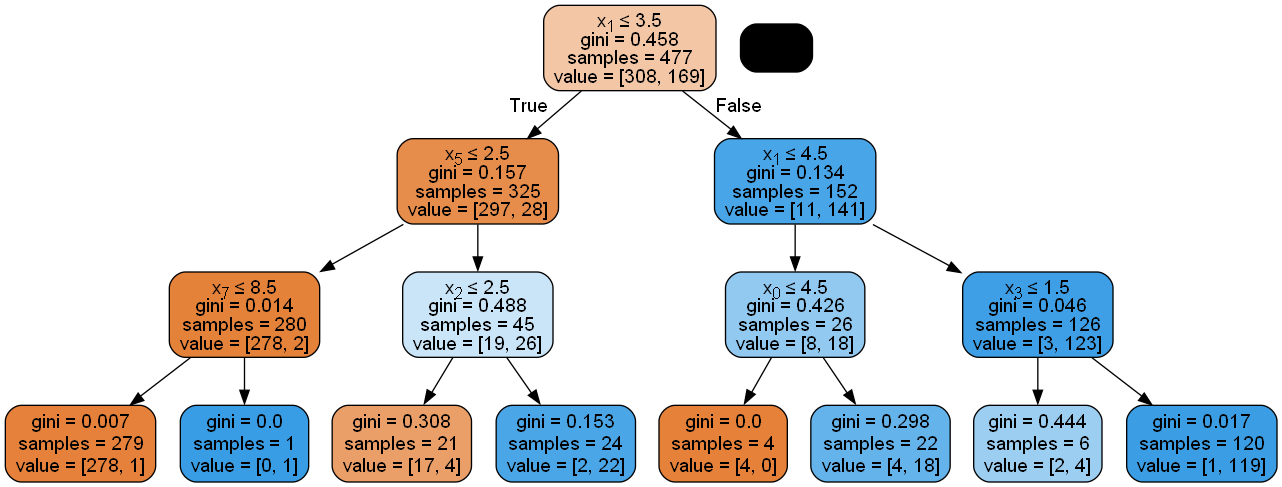

In [59]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

best_depth = max_depths[accuracies.index(max(accuracies))]
# best_tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=58)
best_tree_model = DecisionTreeClassifier(max_depth=best_depth)
best_tree_model.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(best_tree_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
